In [105]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Tallverdier
Sommer_A = 2000
Vinter_A = 7500

# Husk å endre Q ettersom det er forskjellige verdier for sommer og vinter, kanskje

# Definerer symboler
A,B,Q = sp.symbols("A B Q", real=True, positive=True)

# Invers etterspørselsfunksjon
def invers_e(A, B, Q):
    return A-(B*Q)

# Inntekt
def inntekt(Q):
    return invers_e(A,B,Q) * Q

# Marginalinntekt derivert med hensyn på Q
mr = sp.diff(inntekt(Q), Q)

# Definerer marginalinntekten som en funksjon
def marginalinntekt(A,B,Q):
    return A-(2*B*Q)

# Løser marginalinntekt for Q (for teoridel)
mi_mk = sp.solve(sp.Eq(marginalinntekt(500, 4/5, Q), 60))

# Løser etterspørsel for Q (for teoridel)
dvl_stop = sp.solve(sp.Eq(invers_e(500, 4/5, Q), 60))


In [106]:
mi_mk

[275.000000000000]

In [107]:
inntekt(Q)

Q*(A - B*Q)

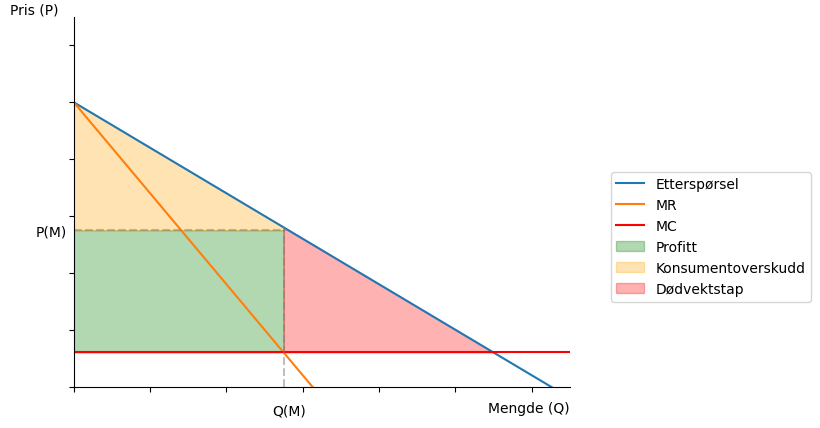

In [108]:
#Q-verdier
Q = np.linspace(0.001, 650, 1000)

#akse limitations
xlim = (0, 650)
ylim = (0, 650)


#funksjon for å skape akse
def create_ax():
                fig, ax = plt.subplots()
                ax.set_ylabel('Pris (P)', loc='top', rotation=0)
                ax.set_xlabel('Mengde (Q)', loc='right')
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')
                ax.set(xlim=xlim)
                ax.set(ylim=ylim)
                return fig, ax

#tall er bare eksempler for illustrasjon!!!!
#skaper fig
fig, ax = create_ax()
ax.plot(Q, invers_e(500, 4/5, Q), label="Etterspørsel")
ax.plot(Q, marginalinntekt(500, 4/5, Q), label="MR")

#fjerner tall fra akse
ax.set_yticklabels([])
ax.set_xticklabels([])

#horizontal linje som representerer mc
plt.axhline(y=60, color='r', linestyle='-', label="MC")

#optimalt kvantum monopol vertikal
plt.vlines(x=mi_mk[0], ymin=0, ymax=invers_e(500, 4/5, mi_mk[0]), color='grey', linestyle='dashed', alpha=0.5)

#optimal pris monopol horizontal
plt.hlines(y=mi_mk[0], xmin=0, xmax=invers_e(500, 4/5, mi_mk[0]), color='grey', linestyle='dashed', alpha=0.5)

#verdi mellom 0 og optimalt kvantum
v = np.linspace(0.001, 275, 1000)

h=np.linspace(275.001, 550, 1000)

#Fill Between for å vise profitt
ax.fill_between(v, 60, 275, color = "green",alpha = 0.3,label='Profitt')

#Fill Between for å vise konsumentoverskudd
ax.fill_between(v, 275, invers_e(500, 4/5, v), color = "orange",alpha = 0.3,label='Konsumentoverskudd')

#tilpasning monopol
ax.annotate("Q(M)", xy=(275-15, -50), annotation_clip=False)
ax.annotate("P(M)", xy=(-50, 275-10), annotation_clip=False)

ax.set(xlim=(0, 650))
ax.set(ylim=(0, 650))

#dødvektstap
ax.fill_between(h, 60, invers_e(500, 4/5, h), color = "red",alpha = 0.3,label='Dødvektstap')

#legende
ax.legend(bbox_to_anchor=(1.5,0.6))
plt.show()

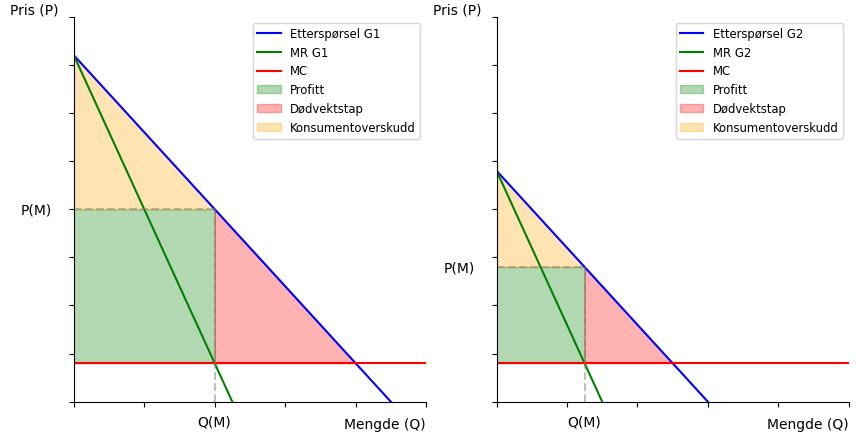

In [112]:
#fig for etterspørsel fra 2 grupper

#eksempeltall er fra læreboken. (Pypall, 2016, s. 97-102)

#funksjon for å skape akse
def create_ax_double_panel():
                fig, axs = plt.subplots(1,2, figsize=(10, 5))
                for i in range(2):
                 axs[i].set_ylabel('Pris (P)', loc='top', rotation=0)
                 axs[i].set_xlabel('Mengde (Q)', loc='right')
                 axs[i].set(xlim=(0, 10))
                 axs[i].set(ylim=(0, 40))
                 axs[i].spines['top'].set_color('none')
                 axs[i].spines['right'].set_color('none')
                 axs[i].set_xticklabels([])
                 axs[i].set_yticklabels([])
                return fig, axs

q1 = np.linspace(0.01, 9, 1000)
q2 = np.linspace(0.01, 6, 1000)

#lager figur
fig, axs = create_ax_double_panel()

#plot 1
axs[0].plot(q1, invers_e(36, 4, q1), label="Etterspørsel G1", color="blue")
axs[0].plot(q1, marginalinntekt(36, 4, q1), label="MR G1", color="green")
axs[0].axhline(y=4, color='r', linestyle='-', label="MC")

v6 = np.linspace(0.001, 4, 1000)
v7 = np.linspace(0.001, 2.5, 1000)
v8 = np.linspace(2.501, 5, 1000)
v9 = np.linspace(4.001, 8, 1000)

#Fill Between for å vise profitt
axs[0].fill_between(v6, 4, 20, color = "green",alpha = 0.3,label='Profitt')

#Fill Between for å vise dvl
axs[0].fill_between(v9, 4, invers_e(36, 4, v9), color = "red",alpha = 0.3,label='Dødvektstap')

#Fill Between for å vise konsumentoverskudd
axs[0].fill_between(v6, 20, invers_e(36, 4, v6), color = "orange",alpha = 0.3,label='Konsumentoverskudd')

axs[0].legend(loc="best")

#optimalt kvantum monopol vertikal
axs[0].vlines(x=4, ymin=0, ymax=invers_e(36, 4, 4), color='grey', linestyle='dashed', alpha=0.5)

#optimal pris monopol horizontal
axs[0].hlines(invers_e(36,4,4), xmin=0, xmax=4, color='grey', linestyle='dashed', alpha=0.5)


#plot 2
axs[1].plot(q2, invers_e(24, 4, q2), label="Etterspørsel G2", color="blue")
axs[1].plot(q2, marginalinntekt(24, 4, q2), label="MR G2", color="green")
axs[1].axhline(y=4, color='r', linestyle='-', label="MC")

#Fill Between for å vise profitt
axs[1].fill_between(v7, 4, 14, color = "green",alpha = 0.3,label='Profitt')

#Fill Between for å vise dvl
axs[1].fill_between(v8, 4, invers_e(24, 4, v8), color = "red",alpha = 0.3,label='Dødvektstap')

#Fill Between for å vise konsumentoverskudd
axs[1].fill_between(v7, 14, invers_e(24, 4, v7), color = "orange",alpha = 0.3,label='Konsumentoverskudd')

#optimalt kvantum monopol vertikal
axs[1].vlines(x=2.5, ymin=0, ymax=invers_e(24, 4, 2.5), color='grey', linestyle='dashed', alpha=0.5)

#optimal pris monopol horizontal
axs[1].hlines(invers_e(24,4,2.5), xmin=0, xmax=2.5, color='grey', linestyle='dashed', alpha=0.5)


#tilpasning monopol
axs[0].annotate("Q(M)", xy=(4-0.5, -2.5), annotation_clip=False)
axs[0].annotate("P(M)", xy=(-1.5, 20-0.5), annotation_clip=False)


#tilpasning monopol
axs[1].annotate("Q(M)", xy=(2.5-0.5, -2.5), annotation_clip=False)
axs[1].annotate("P(M)", xy=(-1.5, 14-0.5), annotation_clip=False)

axs[0].legend(loc="best", fontsize="small")
axs[1].legend(loc="best", fontsize="small")
plt.show()

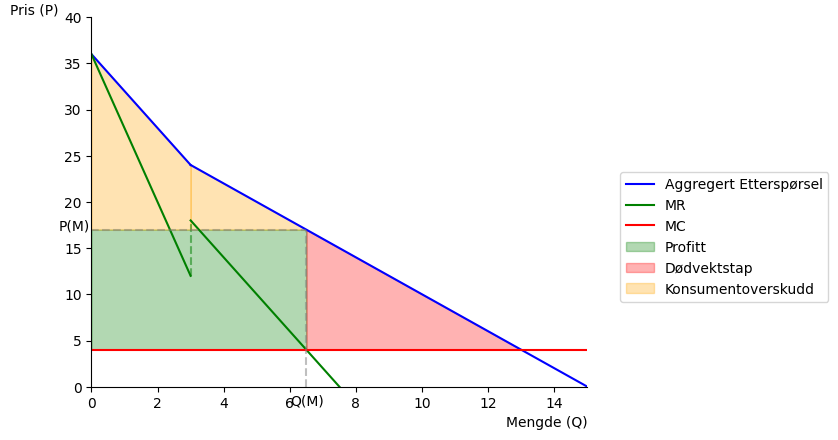

In [110]:
#aggregert etterspørsel

#eksempeltall er fra læreboken. (Pypall, 2016, s. 97-102)
Q= sp.symbols("Q", real=True, positive=True)
q_m = sp.solve(sp.Eq(marginalinntekt(30, 2, Q), 4))
Q = np.linspace(0.001, 650, 1000)


xlim=(0, 15)
ylim = (0, 40)
#lager figur
fig,ax=create_ax()

q1 = np.linspace(0.001, 3, 1000)
q2= np.linspace(3.001, 15, 1000)

#etterspørsel
ax.plot(q1, invers_e(36, 4, q1), c="blue")
ax.plot(q2, invers_e(30, 2, q2), c="blue", label="Aggregert Etterspørsel")

#marginalinntekt
ax.plot(q1, marginalinntekt(36, 4, q1), c="green")
ax.plot(q2, marginalinntekt(30, 2, q2), c="green", label="MR")
plt.vlines(x=3, ymin=12, ymax=18, color='green', linestyle='dashed', alpha=0.5)

#mc
ax.axhline(y=4, color='r', linestyle='-', label="MC")

#optimalt kvantum monopol vertikal
plt.vlines(x=q_m[0], ymin=0, ymax=invers_e(30, 2, q_m[0]), color='grey', linestyle='dashed', alpha=0.5)

#optimal pris monopol horizontal
plt.hlines(invers_e(30,2,q_m[0]), xmin=0, xmax=q_m[0], color='grey', linestyle='dashed', alpha=0.5)

v2 = np.linspace(0.001, 6.5, 1000)
v3 = np.linspace(6.501, 13, 1000)
v4 = np.linspace(0.001, 3, 1000)
v5 = np.linspace(3.001, 6.5, 1000)

#Fill Between for å vise profitt
ax.fill_between(v2, 4, invers_e(30,2,6.5), color = "green",alpha = 0.3,label='Profitt')

#Fill Between for å vise dvl
ax.fill_between(v3, 4, invers_e(30,2,v3), color = "red",alpha = 0.3,label='Dødvektstap')

#fillbetween for å vise ko
ax.fill_between(v4, 17, invers_e(36, 4, v4), color = "orange",alpha = 0.3)
ax.fill_between(v5, 17, invers_e(30, 2, v5), color = "orange",alpha = 0.3, label="Konsumentoverskudd")

#tilpasning monopol
ax.annotate("Q(M)", xy=(6.5-0.5, -2), annotation_clip=False)
ax.annotate("P(M)", xy=(-1, 17), annotation_clip=False)

#fjerner tall fra akse
#ax.set_yticklabels([])
#ax.set_xticklabels([])

#legende
ax.legend(bbox_to_anchor=(1.5,0.6))
plt.show()